# Task 4.9 Part 2

### This Script Contains the Following Points
### 1. Importing Libraries & Data
### 2. Histogram of Orders by Hour of the Day
### 3. Bar Chart of Customer Loyalty
### 4. Line Chart of Prices based on the Order Hour Using Sample Data
### 5. Line Chart of Customer Age and Family Situation Using Sample Data
### 6. Scatterplot of Age and Income
### 7. Exporting Visualizations as PNG

## 1. Importing Libraries & Data

In [5]:
#import libraries and data vis libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
#create folder path
path = r'/Users/kimkmiz/Documents/Instacart Basket Analysis 2024'

In [7]:
#importing project data
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'instacart_combined.pkl'))

In [8]:
#check output
df_instacart.head(5)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [9]:
#print column titles to ensure spelling is correct when creating charts
#print data types to ensure charts are selected appropriately for the data type
df_instacart.dtypes

user_id                         int64
First Name                     object
Surnam                         object
Gender                         object
STATE                          object
Age                             int64
date_joined                    object
number_of_dependants            int64
marital_status                 object
income                          int64
product_id                      int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
order_id                        int64
order_number                    int64
order_day_of_week               int64
order_hour_of_day               int64
days_since_prior_order        float64
add_to_cart_order               int64
reordered                       int64
price_range_loc                object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag

## 2. Histogram of Orders by Hour of the Day

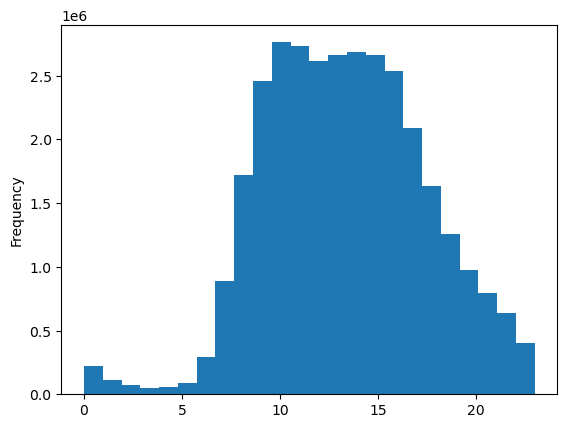

In [11]:
#create histogram of order hour of day
#use bin of 24 for 24 hours of the day
hist = df_instacart['order_hour_of_day'].plot.hist(bins = 24)

**Histogram Description:**

The histogram peaks from midday to early evening, meaning this is when the most orders are placed.  From this peak it is clear that the most sales are during lunch and dinner time, with the least sales during breakfast. 

## 3. Bar Chart of Customer Loyalty

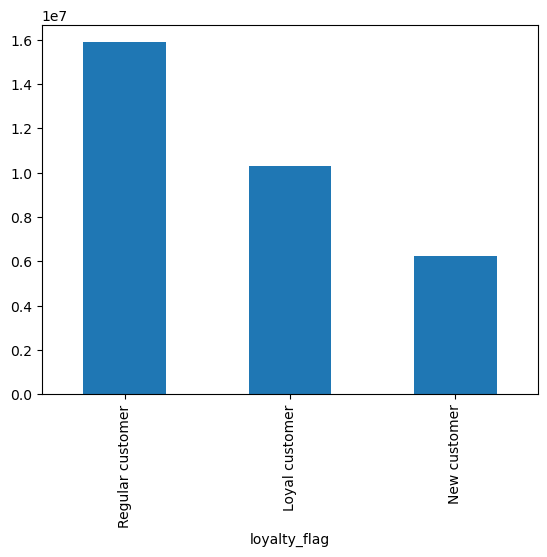

In [14]:
#create bar chart of 'loyalty_flag'
bar = df_instacart['loyalty_flag'].value_counts().plot.bar()

**Bar Chart Description:**

The bar chart indicates that the majority of customers are Regular Customers, with the Loyal Customers following.  New Customers account for the least amount of customers.

## 4. Line Chart of Sample Data

In [17]:
#Must create sample of data
#will generate seed first
#Next create a 70/30 split
#next split dataframe into two samples, big and small

In [18]:
# Create a random sample by generating a seed
np.random.seed(4)

In [19]:
# Create a dev list based on the data split of the 70/30
dev = np.random.rand(len(df_instacart)) <= 0.7

In [20]:
# Split the dataframe into two samples
big = df_instacart[dev]
small = df_instacart[~dev]

In [21]:
# Compare the dataframe length to the sum of the big and small samples
len(df_instacart)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
#length matches, successfully split

In [24]:
# Reduce the samples to columns needed
df_instacart_2 = small [['order_hour_of_day','prices']]

In [25]:
# Check if the subset of the sample was made properly
df_instacart_2.head(5)

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


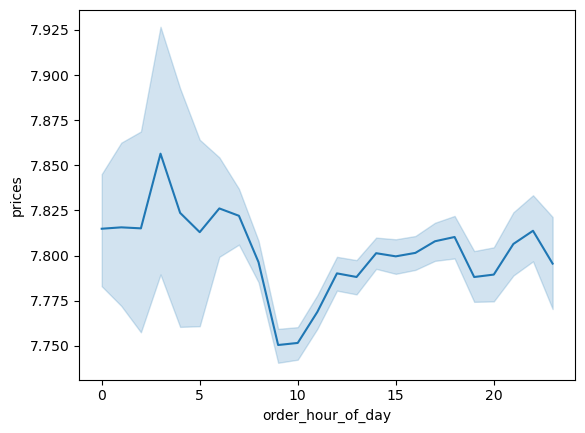

In [26]:
# Create a line chart
line = sns.lineplot(data = df_instacart_2, x = 'order_hour_of_day',y = 'prices')

**Line Chart Description:**

The line chart shows that orders that are placed earlier in the day tend to be more expensive than orders placed midday and later. This may be a reason why there are more orders placed midday and later.  

## 5. Line Chart of Customer Age and Family Situation Using Sample Data

In [29]:
# Reduce previously made sample to only the columns needed
df_instacart_3 = small [['Age','number_of_dependants']]

In [30]:
# Check if the subset of the sample was made properly
df_instacart_3.head(5)

,Age,number_of_dependants
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3


In [31]:
#confirmed that subset made properly

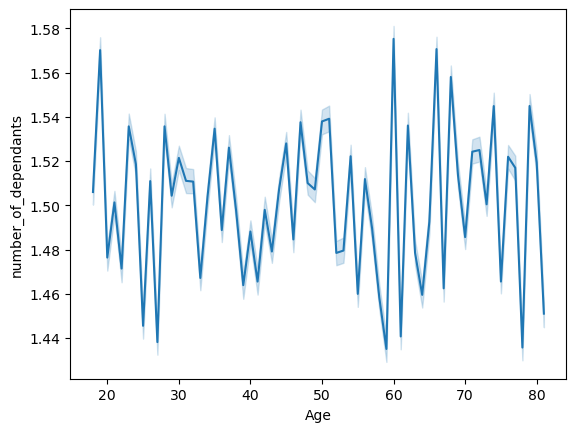

In [32]:
# Create a line chart
line_2 = sns.lineplot(data = df_instacart_3, x = 'Age',y = 'number_of_dependants')

**Line Chart Description:**

There is no clear trend between customer age and the number of dependents.

## 6. Scatterplot of Age and Income

In [35]:
#Reduce previously made sample to columns needed
df_instacart_4 = small [['Age','income']]

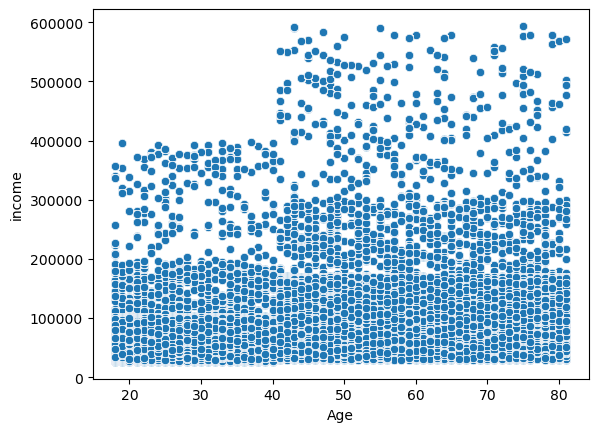

In [36]:
#Create a scatterplot
scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = df_instacart_4)

**Scatterplot Description:**

Income varies widely among younger age groups (20-40), with most earning lower incomes. From around age 40 onwards, there's an upward trend, with many higher-income data points. This suggests income may increase with age. The scatterplot shows higher income concentrations for those over 40, indicating a potential rise in median income with age, but statistical analysis is needed to confirm this relationship.

## 7. Exporting Visualizations as PNG

In [39]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [40]:
#export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [41]:
#export Line chart 1
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_by_order_hour_of_day.png'))

In [42]:
#export line chart 2
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_number_of_dependants.png'))

In [43]:
#export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_and_income.png'))